In [1]:
import matplotlib.pyplot as plt

In [2]:
class GameOfLife(object):  
    
    def __init__(self, x_dim, y_dim):
        '''
        Initialises the dimensions of the grid for the game and uses list comprehension 
        to create a list of lists 'life_grid' setting all values to 0
        
        Parameters: 
        Numbers of rows 'y_dim' and the number of columns 'x_dim'
        
        Returns: 
        None
        '''

        # Initialize a 2D list with dimensions x_dim by y_dim filled with zeros.
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.life_grid = [[0 for _ in range(y_dim)] for _ in range(x_dim)]
    
    
    def get_grid(self):
        '''
        Displays the current state of the grid as a list of lists
        
        Parameters: 
        None
        
        Returns: 
        2-D list 'life_grid'
        '''
        # Implement a getter method for your grid.
        return self.life_grid

    
    def print_grid(self):
        '''
        Uses print to show the game grid in a more user friendly manner. Nested for loops go through each
        cell of the grid
        
        Parameters:
        None
        
        Returns: 
        Printed version of the game grid
        '''
        # Implement a method to print out your grid in a human-readable format.
        for i in range(self.x_dim):
            for j in range(self.y_dim):
                print(self.life_grid[i][j], end = ' | ')
            print()
            print(self.y_dim * '----')
                
                
    def populate_grid(self, coord):
        '''
        Populates the game grid with live cells at the specified coordinates.
    
        Parameters:
        coord: A list of tuples. Each tuple represents the (x, y) coordinates of a live cell.

        Returns:
        The updated life_grid with the new live cells.
        '''
        # Given a list of 2D coordinates (represented as tuples/lists with 2 elements each),
        # set the corresponding elements in your grid to 1.
        for row, col in coord:
            if 0 <= row < self.y_dim and 0 <= col < self.x_dim:
                self.life_grid[row][col] = 1
        return self.life_grid
          
        
    def make_steps(self):
        '''
        Creates sum_grid with same dimensions as life_grid and fills it with 0's. 
        Checks the neighbouring cells of each cell and totals the amount of live adjacent cells
        
        Parameters: 
        None
        
        Returns:
        The updated life_grid with new live and dead cells
        '''
        sum_grid = [[0 for _ in range(self.y_dim)] for _ in range(self.x_dim)]
    
        # Iterates through each cell and sums the number of live neighbouring cells
        for row in range(self.x_dim):
            for col in range(self.y_dim):
                for a in range((row - 1), (row + 2)):
                    for b in range((col - 1), (col + 2)):
                        if 0 <= a < self.x_dim and 0 <= b < self.y_dim:
                            sum_grid[row][col] += self.life_grid[a][b]
                sum_grid[row][col] -= self.life_grid[row][col] # If the cell is alive subtract it's value to avoid double counting
                        
        # Iterates through each cell and carries out the'Game of Life' logic to see if the cell lives or dies
        for row in range(self.x_dim):
            for col in range(self.y_dim):
                if self.life_grid[row][col] == 1:
                    if sum_grid[row][col] < 2 or sum_grid[row][col] > 3:
                        self.life_grid[row][col] = 0
                else:
                    if sum_grid[row][col] == 3:
                        self.life_grid[row][col] = 1
                        
        return self.life_grid
    
    
    def make_n_steps(self, n):
        '''
        Iterates through the game 'n' number of times
        
        Parameters:
        n: the number of times the game will iterate through
        
        Returns:
        The state of the games grid (life_grid) after running for 'n' iterations
        '''
        # Implement a method that applies the make_step method n times.
        for i in range(n):
            self.make_steps()
        return self.life_grid    
    
    
    def draw_grid(self):
        '''
        Draws the current state of the game as a graphical plot using matplot lib
        
        Parameters:
        None
        
        Returns:
        Matplot lip scatter plot of the current state of the game
        '''
        # Initialize empty lists for x and y coordinates
        x = []
        y = []

        # Initialize empty lists for colors (yellow for alive, white for dead)
        colors = []

        # Fill the coordinate arrays and colors
        for i in range(self.x_dim):
            for j in range(self.y_dim):
                x.append(j)
                y.append(i)
                if self.life_grid[j][i] == 1:
                    colors.append('red')  # Alive cells are red
                else:
                    colors.append('midnightblue')   # Dead cells are midnight blue

        # Set up the plot
        fig, ax = plt.subplots(figsize=(self.x_dim, self.y_dim))
        ax.set_aspect('equal')  # Set aspect ratio to be equal
        
        # Set the background color to light gray
        ax.set_facecolor('lightgray')

        # Draw the scatter plot with squares
        scatter = ax.scatter(x, y, c=colors, s=1000, marker='s')

        # Customize the plot appearance
        ax.set_xlim(-0.5, self.x_dim - 0.5)
        ax.set_ylim(-0.5, self.y_dim - 0.5)
        # ax.invert_yaxis()  # Invert the y-axis to match the grid orientation

        # Add a legend
        legend_labels = {0: 'Dead', 1: 'Alive'}
        legend_elements = [plt.Line2D([0], [0], marker='s', color='w', label=legend_labels[i], markersize=10, markerfacecolor=colors[i]) for i in range(2)]
        ax.legend(handles=legend_elements, loc='upper right')

        # Show the plot
        plt.show()

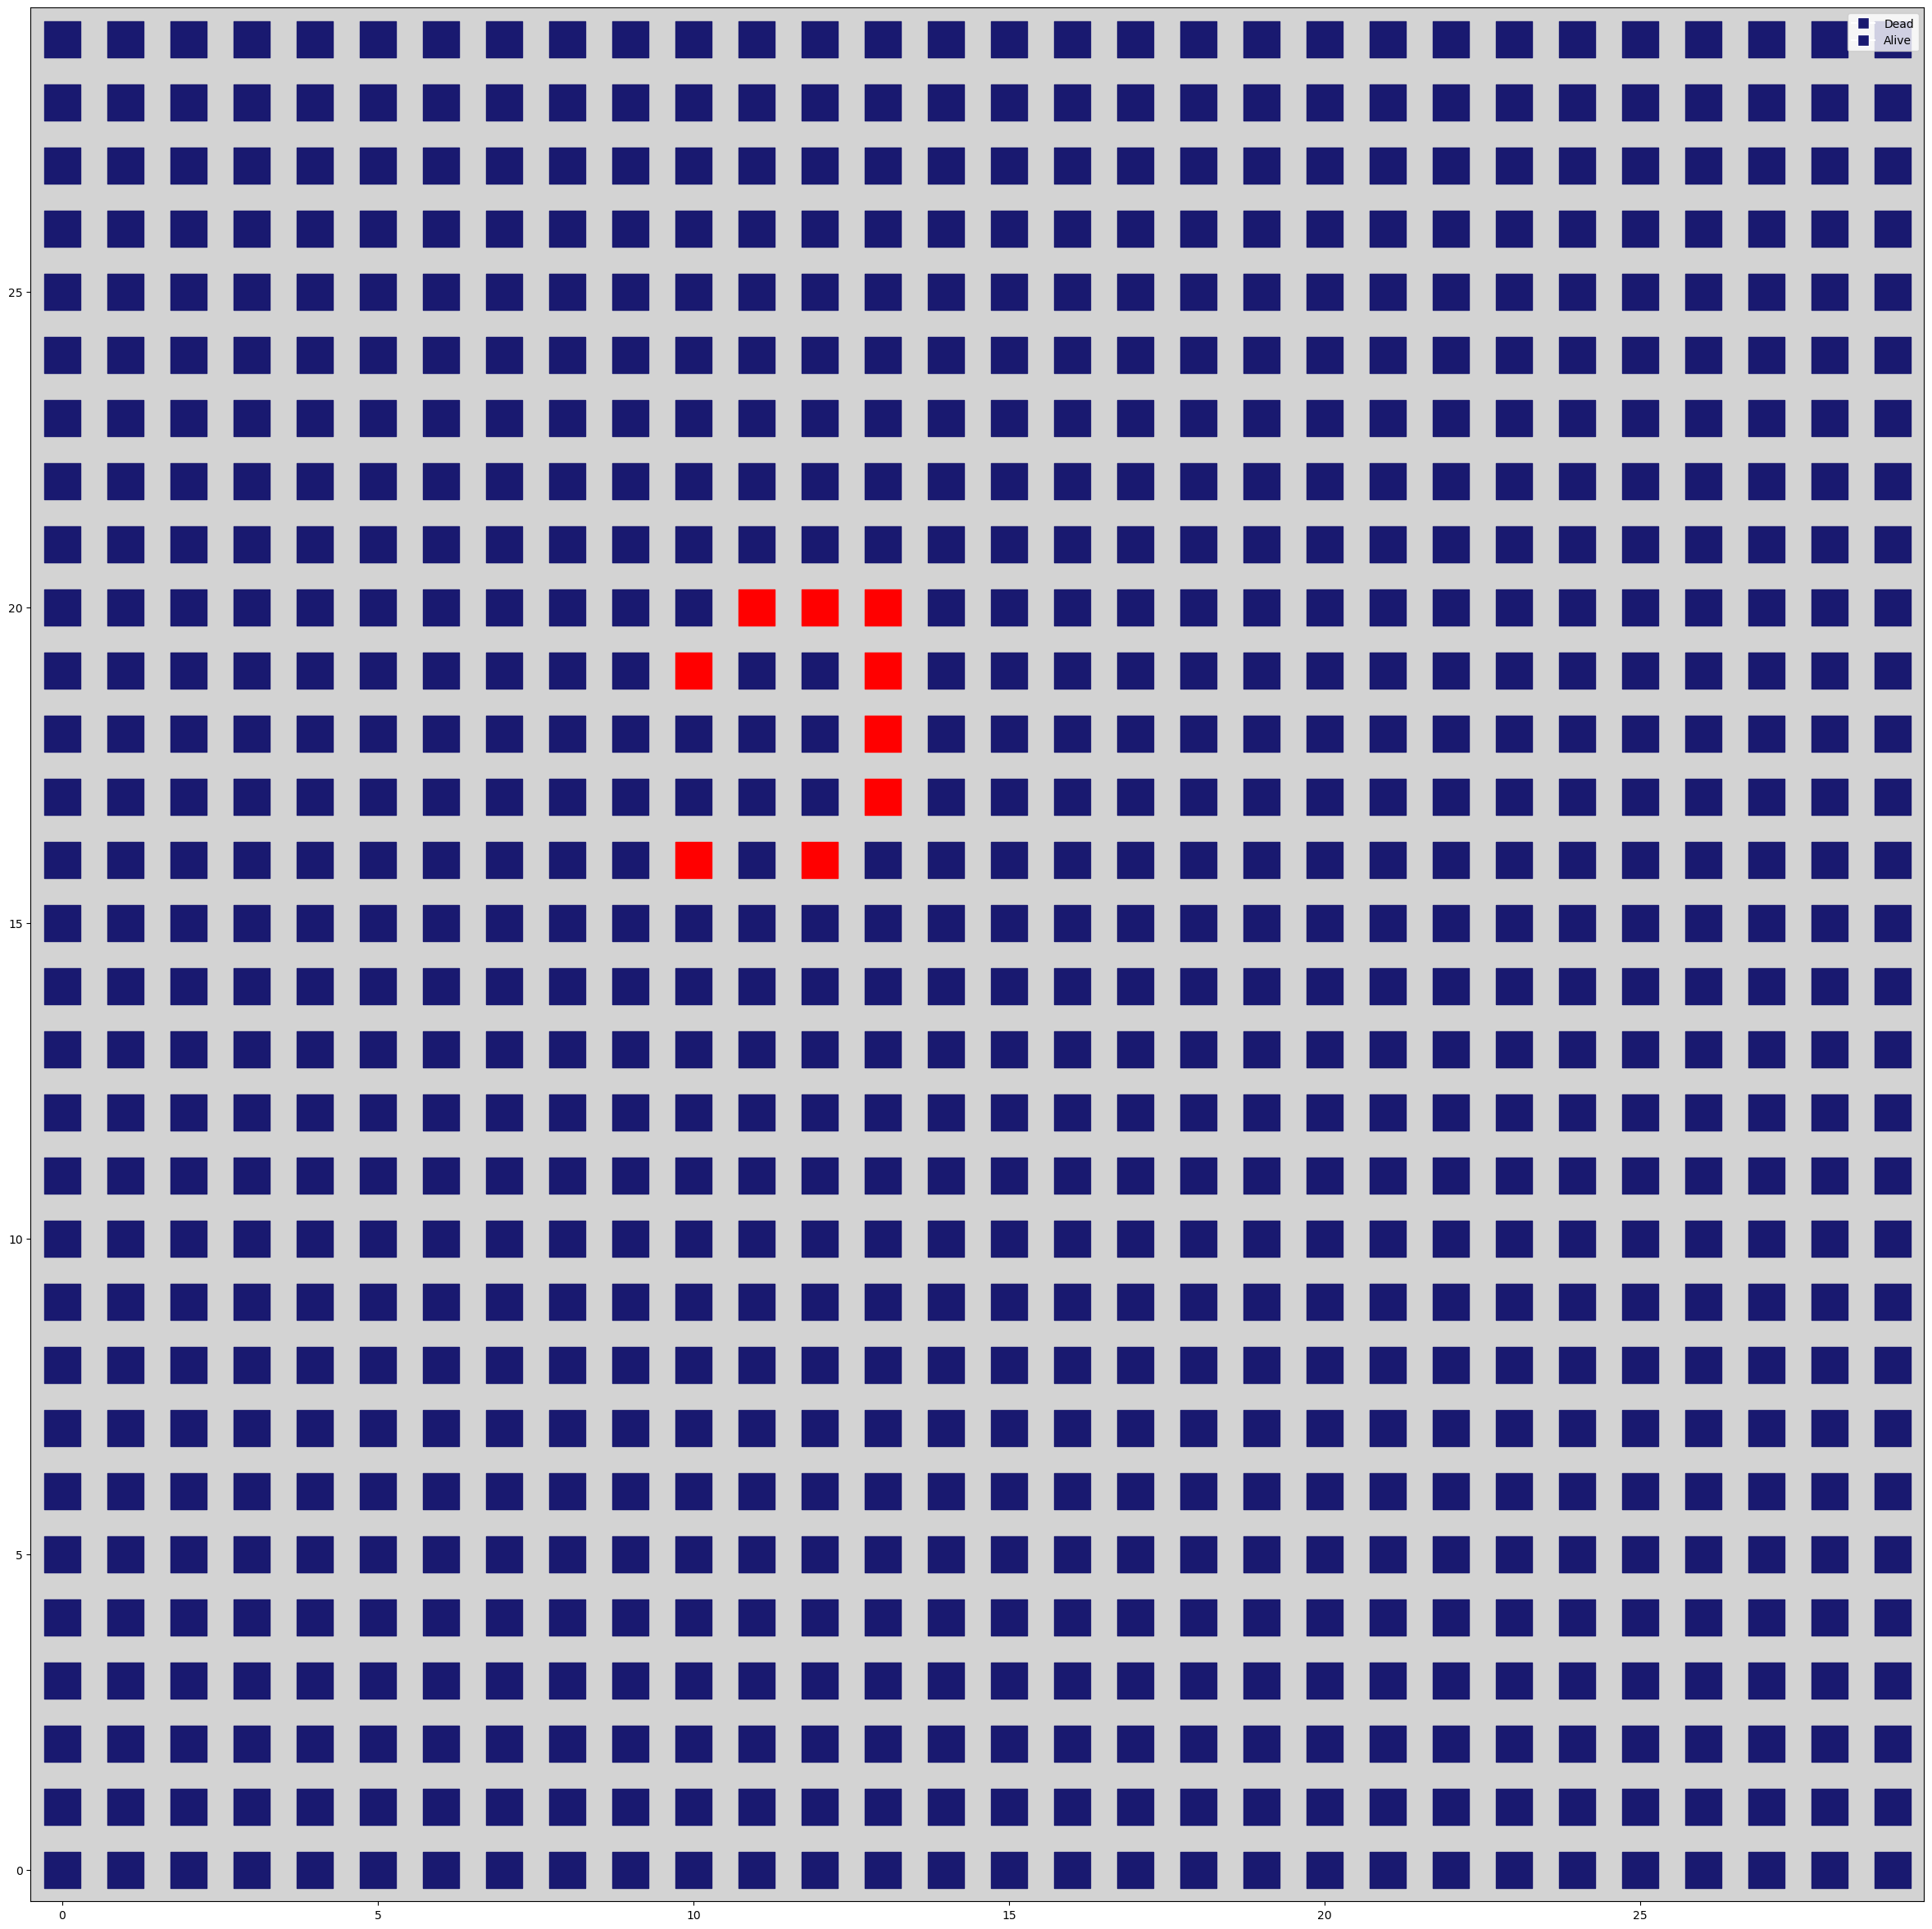

In [3]:
game1 = GameOfLife(30,30)
my_tuple = ((10, 10), (10, 13), (11, 14), (12, 10), (12, 14), (13, 11), (13, 12), (13, 13), (13, 14))
game1.populate_grid(my_tuple)
game1.make_n_steps(12)
game1.draw_grid()